# Regression models with airline passengers dataset

**With the airline passengers time series, you will apply popular traditional regression models, like Linear Regression, Support Vector Regression and Random Forest Regression. Yu can use any regression metric you like.**

**Train-test split the data, and then transform the time series into machine-learning data for SciKit-Learn, i.e. time series as input *X* and a new target variable *Y* for supervised regression models.** 

**NOTE: In this session, do not use differencing when generating the target variable. Even though this is suboptimal, we want to see if the model can learn trends and extrapolate regardless. In the next session, you will use differencing.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [3]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df['LogPassengers'] = np.log(df['Passengers'])

In [6]:
df.head()

,Passengers,LogPassengers
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


In [7]:
# Create training and test sets

N_test = 12

train = df.iloc[: -N_test]
test = df.iloc[-N_test :]

**Make a 'supervised' machine-learning dataset by converting the time series into input (*X*) and output (*Y*), i.e. manually implement AutoRegressive model by using *T* number of past values to predict for the next value in the target output.**

**In this case, the *Y* variable is based on ten past lags to predict for the next value.**

In [8]:
# Save logged passengers as NumPy array - easier to index
series = df['LogPassengers'].to_numpy()

T = 10
X = []
Y = []

# Generate predictions given 10 previous timesteps
for t in range(len(series) - T):
    x = series[t: t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)


In [9]:
# Convert X and Y to NumPy arrays - easier to index

X = np.array(X).reshape(-1, T)

Y = np.array(Y)

N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (134, 10) Y.shape (134,)


In [12]:
X[0:5]

array([[4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
        4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349],
       [4.77068462, 4.88280192, 4.8598124 , 4.79579055, 4.90527478,
        4.99721227, 4.99721227, 4.91265489, 4.77912349, 4.6443909 ],
       [4.88280192, 4.8598124 , 4.79579055, 4.90527478, 4.99721227,
        4.99721227, 4.91265489, 4.77912349, 4.6443909 , 4.77068462],
       [4.8598124 , 4.79579055, 4.90527478, 4.99721227, 4.99721227,
        4.91265489, 4.77912349, 4.6443909 , 4.77068462, 4.74493213],
       [4.79579055, 4.90527478, 4.99721227, 4.99721227, 4.91265489,
        4.77912349, 4.6443909 , 4.77068462, 4.74493213, 4.83628191]])

In [10]:
# Split X and Y into X_train, y_train, X_test, y_test 

X_train, y_train = X[:-N_test], Y[:-N_test]

X_test, y_test = X[-N_test:], Y[-N_test:]

## Linear Regression

In [14]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print("Train R2 score:", lr.score(X_train, y_train))

Train R2 score: 0.9599443783339898


In [15]:
print("Test R2 score:", lr.score(X_test, y_test))

Test R2 score: 0.6910953044565618


**Training score of 96% is very good, but the test score of 69% reveals how little the model has learned.**

In [16]:
# Boolean index original dataset to index train and test sets

train_idx = df.index <= train.index[-1]

test_idx = ~train_idx

# First T values are not predictable since they do not have T past values
train_idx[:T] = False

**The Linear Regression model only generates predictions that are one-step forecasts, i.e. predicting for the next value in the series given 10 past lags.**

In [17]:
# Assign 1-step forecasts to original data

df.loc[train_idx, 'LR_1step_train'] = lr.predict(X_train)
df.loc[test_idx, 'LR_1step_test'] = lr.predict(X_test)

In [24]:
df.tail(20)

,Passengers,LogPassengers,LR_1step_train,LR_1step_test,LR_multistep
Month,,,,,
1959-05-01,420,6.040255,6.080939,NaN,NaN
1959-06-01,472,6.156979,6.184389,NaN,NaN
1959-07-01,548,6.306275,6.156751,NaN,NaN
1959-08-01,559,6.326149,6.251925,NaN,NaN
1959-09-01,463,6.137727,6.193914,NaN,NaN
1959-10-01,407,6.008813,6.062714,NaN,NaN
1959-11-01,362,5.891644,5.891027,NaN,NaN
1959-12-01,405,6.003887,5.891858,NaN,NaN
1960-01-01,417,6.033086,NaN,6.101198,6.101198


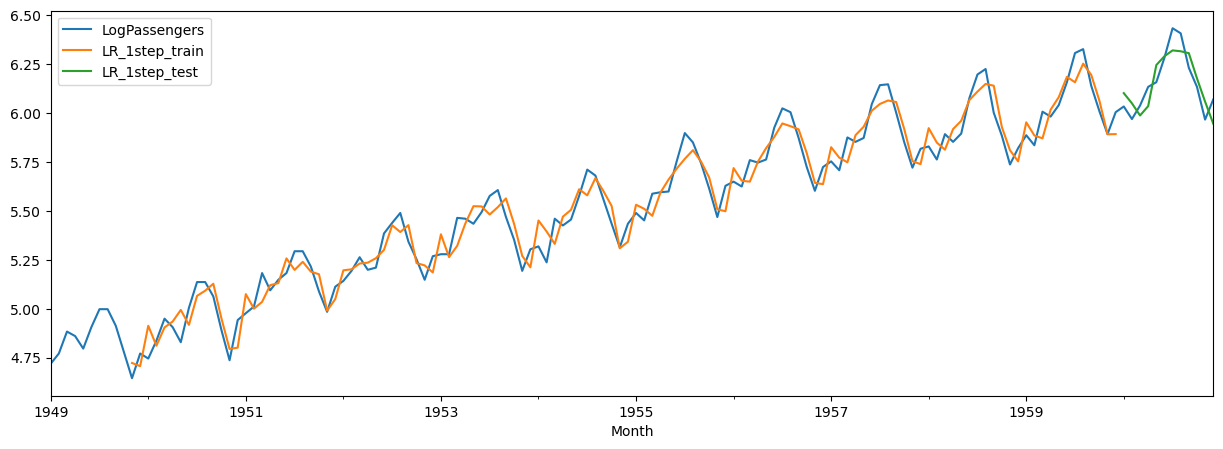

In [18]:
# Plot 1-step forecast

df[['LogPassengers', 'LR_1step_train', 'LR_1step_test']].plot(figsize=(15, 5));

**The model underestimates the peaks, but it does follow the same directions as the true data.**

### Multi-Step Forecast

**StatsModels only generate multi-step forecasts, i.e. predicting for several values after the end of the training set. To create multi-step predictions from the Linear Regression model, you need to manually replace the old prediction values from the test set with newly-generated multi-step predictions (test set is most recent 12 timesteps of data) using the incremental method. Incremental basically means the oldest value is thrown out and the newest prediction is added to the end of the array, and the new predicted values are 'rolled' in.**

In [19]:
multistep_predictions = []

# Obtain first test input - updated as iterated through loop
last_x = X_test[0]

# While list of predictions is shorter than 12
while len(multistep_predictions) < N_test:
    p = lr.predict(last_x.reshape(1, -1))[0]
    
    # Update the predictions list
    multistep_predictions.append(p)
    
    # Make the new input by updating last_x
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

In [20]:
# Save multi-step forecast to original data

df.loc[test_idx, 'LR_multistep'] = multistep_predictions

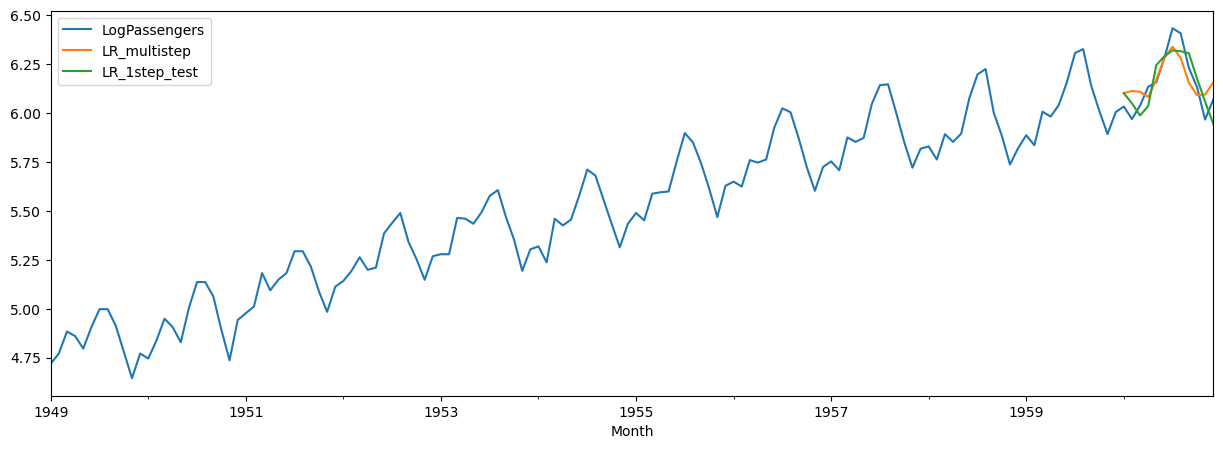

In [21]:
# Plot 1-step and multi-step forecast for test set only

df[['LogPassengers', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15, 5));

**The multi-step forecast appears to be a little worse than the one-step forecast...**

### Create Multi-Output supervised model

**With multi-step forecasts, i.e. predicting for several timesteps in the future, you can predict those new values using the incremental method or the multi-output method. This literally means giving multiple outputs at once rather than incrementally, by creating a multiple output 'supervised' dataset.**

In [25]:
# No of input timesteps 
Tx = T

# No of output timesteps
Ty = N_test

# New dataset
X = []
Y = []

for t in range(len(series) - Tx - Ty + 1):
    # Input series same as before
    x = series[t:t + Tx]
    X.append(x)
    # Output series starting from t+Tx
    y = series[t + Tx:t + Tx + Ty]
    Y.append(y)


In [26]:
# Convert X and Y to NumPy arrays

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)

N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (123, 10) Y.shape (123, 12)


In [27]:
# Split X and Y into Xtrain, Ytrain, Xtest, Ytest

Xtrain, Ytrain = X[:-1], Y[:-1]

Xtest, Ytest = X[-1:], Y[-1:]

In [28]:
lr = LinearRegression()

lr.fit(Xtrain, Ytrain)

print("Train R2 score:", lr.score(Xtrain, Ytrain))

Train R2 score: 0.9734607773512528


**The training score has improved slightly this time, but this is misleading since the target is actually the same value repeated multiple times.** 

In [29]:
# SST is null!

lr.score(Xtest, Ytest)

C:\Users\shmel\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

**With only a single sample in the test set, R2 function cannot compute the sample variance so it does not work. You need to flatten the test values and predictions before running through R2 metric. This is best done outside the model.**

In [30]:
print("Test R2 score:\n")
r2_score(lr.predict(Xtest).flatten(), Ytest.flatten())

Test R2 score:



0.8018749676715229

**Much better test score than before.**

In [31]:
# Save multi-output forecast to dataframe

df.loc[test_idx, 'LR_multioutput'] = lr.predict(Xtest).flatten()

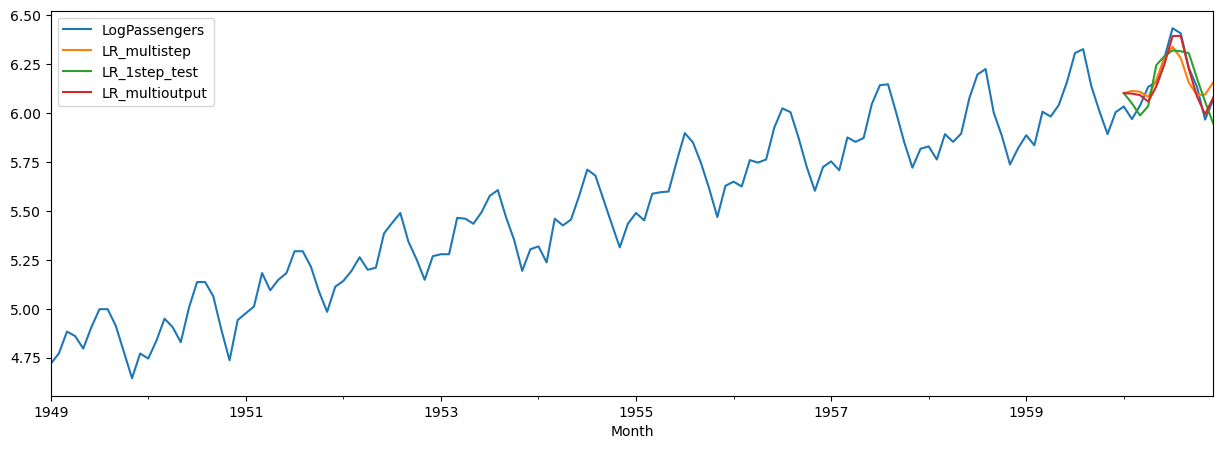

In [32]:
# Plot all forecasts

cols = ['LogPassengers', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']

df[cols].plot(figsize=(15, 5));

**Visually, it looks like the multi-output forecast is the superior model. Compute the MAPE metric for both the multi-step and the multi-output forecasts to compare:**

In [34]:
# Calculate MAPE

mape1 = mean_absolute_percentage_error(y_test, multistep_predictions)
print("multi-step MAPE:", mape1)

mape2 = mean_absolute_percentage_error(y_test, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.012229325023475348
multi-output MAPE: 0.007178924475039777


**As expected, the multi-output MAPE score is better, with Mean Percentage Error scoring approx. 0.72%.**

## Test other regression models

**Create a function using the exact same code above to run the 'multi-step' supervised dataset (X_train, y_train etc.) through other regression models to output one-step and incremental multi-step forecasts.**

**The function accepts the regression model function and its string name (anything you like) to uniquely identify the machine-learning model used in the predictions plots.**

In [35]:
def one_step_and_multistep_forecast(model, name):
    model.fit(X_train, y_train)
    print("One-step forecast:", name)
    print("Train R^2:", model.score(X_train, y_train))
    print("Test R^2 (1-step):", model.score(X_test, y_test))
    
    # Store 1-step forecast
    df.loc[train_idx, f'{name}_1step_train'] = model.predict(X_train)
    df.loc[test_idx, f'{name}_1step_test'] = model.predict(X_test)
    
    # Generate incremental multi-step forecast
    multistep_predictions = []    
    # First test input
    last_x = X_test[0]
    
    while len(multistep_predictions) < N_test:
        p = model.predict(last_x.reshape(1, -1))[0]        
        # Update the predictions list
        multistep_predictions.append(p)        
        # Make the new input
        last_x = np.roll(last_x, -1)
        last_x[-1] = p
        
    # Store multi-step forecast in original data
    df.loc[test_idx, f'{name}_multistep_test'] = multistep_predictions
    
    # MAPE of multi-step forecast
    mape = mean_absolute_percentage_error(y_test, multistep_predictions)
    print("Test MAPE (multi-step):", mape)
    
    # Plot 1-step and multi-step forecast
    cols = ['LogPassengers', 
            f'{name}_1step_train', 
            f'{name}_1step_test', 
            f'{name}_multistep_test']
    df[cols].plot(figsize=(15, 5));

One-step forecast: SVR
Train R^2: 0.9620706864124724
Test R^2 (1-step): 0.34759277730706106
Test MAPE (multi-step): 0.017529446164230467


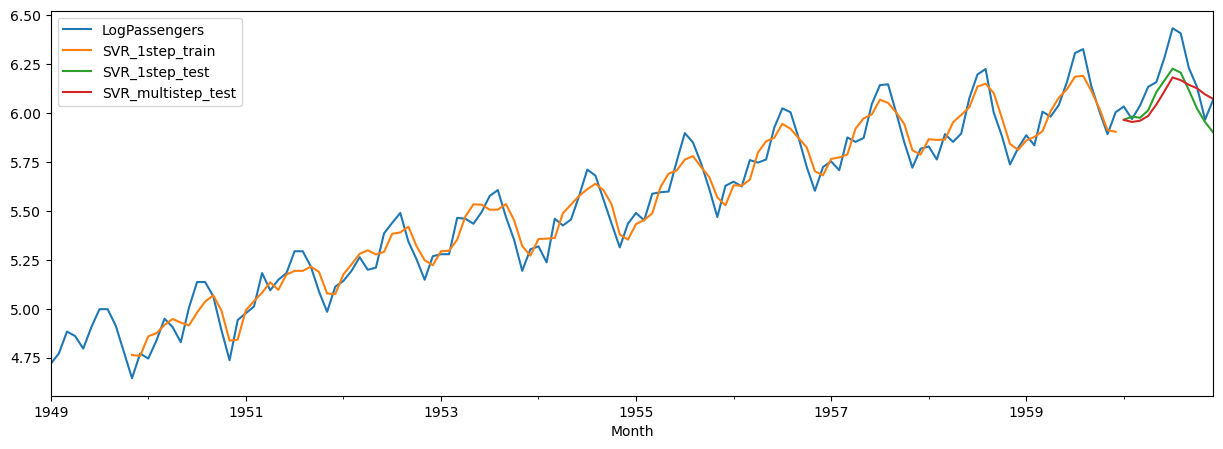

In [36]:
one_step_and_multistep_forecast(SVR(), "SVR")

One-step forecast: RF
Train R^2: 0.9901504167932225
Test R^2 (1-step): 0.20501532867578687
Test MAPE (multi-step): 0.028859055427148395


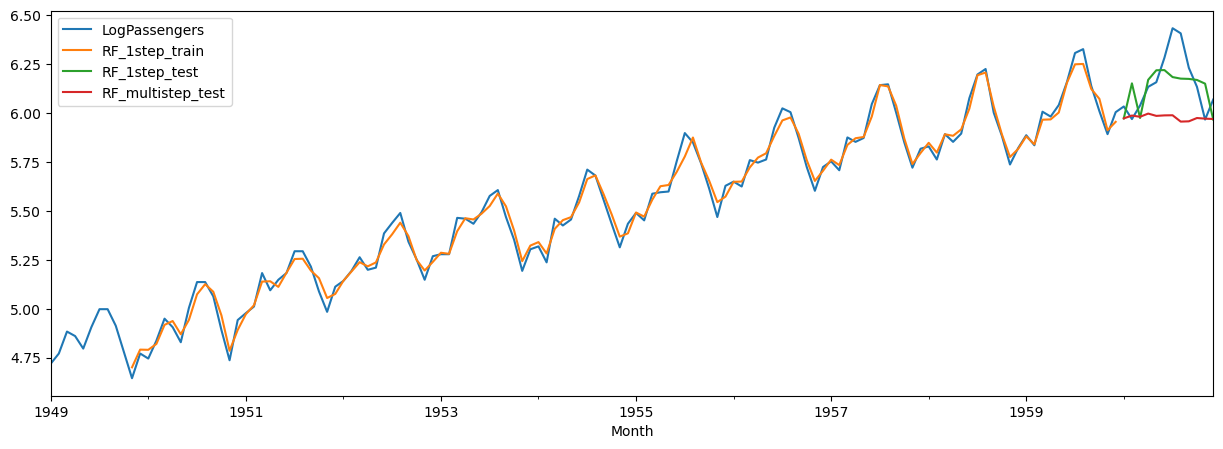

In [37]:
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

**Both SVR and RF perform badly, but remember that this process is without differencing. The Random Forest performs the worst, with the multi-step forecast basically predicting the last known value.**

**Create a function to run the 'multi-output' supervised dataset (Xtrain, Ytrain etc.) through other regression models to output multi-output multi-step forecast. Again, the function accepts the model function and its string name.**

In [38]:
def multi_output_forecast(model, name):
    model.fit(Xtrain, Ytrain)
    
    # Save multi-output predictions to dataframe
    df.loc[test_idx, f'{name}_multioutput'] = model.predict(Xtest).flatten()
    
    # Calculate MAPE score 
    mape = mean_absolute_percentage_error(y_test, df.loc[test_idx, f'{name}_multioutput'])
    print("Test MAPE (multi-output):", mape)
    
    # Plot all forecasts assumiing that other functions have been run
    cols = ['LogPassengers', 
            f'{name}_1step_train', 
            f'{name}_1step_test', 
            f'{name}_multistep_test', 
            f'{name}_multioutput'] 
    df[cols].plot(figsize=(15, 5));

In [39]:
multi_output_forecast(SVR(), "SVR") 

ValueError: y should be a 1d array, got an array of shape (122, 12) instead.

**Support Vector Machine cannot handle multi-output files! This is an example of a machine-learning model that does not work with this method. However, you could still train multiple separate `SVR` models.**

Test MAPE (multi-output): 0.016035214259982226


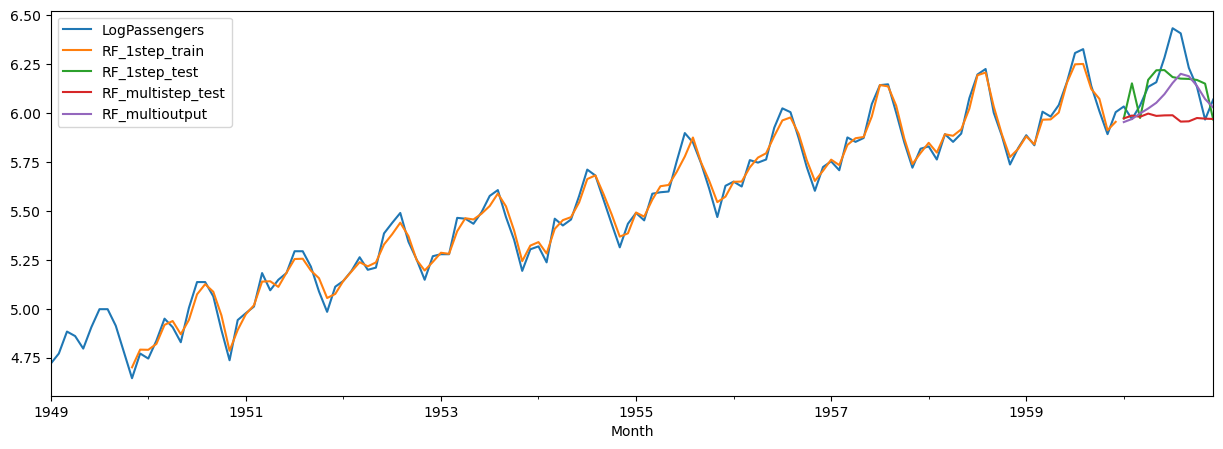

In [40]:
multi_output_forecast(RandomForestRegressor(), "RF")

**Luckily, Random Forest works but it does not perform well either, regardless of low MAPE score of approx. 1.6%.**

**EXERCISE:** 
    
1. **Compute MAPE for non-logged data (i.e. exponentiate the predictions)**
2. **Compare with previous models (e.g. ARIMA, ETS)**